In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

In [9]:
sns.set(font_scale=1.1)
cp = sns.color_palette()
warnings.filterwarnings("ignore")  # Ignore divide by zero numpy warnings

from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
# pd.set_option('display.width', 1000)

In [10]:
def load_results(experiment_name):
    prefix = './../../data/experiment_output/repeat_loan/results'
    filename = f"{prefix}/{experiment_name}.csv"
    results = pd.read_csv(filename)
    return results

In [211]:
def plot_results(results, cmap, markers, subtitles=['(a)', '(b)'], title=None, plot_std=True, exclude=[]):
    results = results.copy()
    for ex in exclude:
        results = results.query("Algo != @exclude")
    
    fig, axes = plt.subplots(1, 2, figsize=(9, 4))
    results = results.copy()
    
    ##################
    # Y0 vs Y1
    ##################
    ax1 = axes[0]
    # Plot point estimate (mean)
    for _, result in results.iterrows():
        color = cmap[result['Algo']]
        marker = markers[result['Algo']]
        ax1.scatter(
            x=result['Y0 AVG'],
            y=result['Y1 AVG'],
            label=result['Algo'],
            s=250,
            alpha=.8,
            c=color,
            marker=marker,
        )
    
    if plot_std:
        results['Y0 std low'] = results['Y0 AVG'] - results['Y0 std']
        results['Y0 std high'] = results['Y0 AVG'] + results['Y0 std']
        results['Y1 std low'] = results['Y1 AVG'] - results['Y1 std']
        results['Y1 std high'] = results['Y1 AVG'] + results['Y1 std']
        for algo_i, algo in enumerate(results['Algo']):
            _results = results.query('Algo == @algo')
            color = cmap[algo] if cmap is not None else cp[algo_i]
            # Plot x-axis standard deviation
            ax1.plot(
                [_results['Y0 AVG'].values[0], _results['Y0 AVG'].values[0]],
                [_results['Y1 std low'].values[0], _results['Y1 std high'].values[0]],
                alpha=.8,
                c=color,
                lw=1,
            )
            # Plot y-axis standard deviation
            ax1.plot(
                [_results['Y0 std low'].values[0], _results['Y0 std high'].values[0]],
                [_results['Y1 AVG'].values[0], _results['Y1 AVG'].values[0]],
                alpha=.8,
                c=color,
                lw=1,
            )

    ax1.set_xlabel('$Y^0$')
    ax1.set_ylabel('$Y^1$')
    ax1.legend().remove()
    ax1.set_title(subtitles[0])
    ax1_xlim  = ax1.get_xlim()
    ax1_ylim  = ax1.get_ylim()
    ax1.set_xlim([ax1_xlim[0]-.01, ax1_xlim[1]+.01])
    ax1.set_ylim([ax1_ylim[0]-.01, ax1_ylim[1]+.01])

    ##################
    # R^D vs 1-|Y1-Y0|
    ##################
    ax2 = axes[1]
    for _, result in results.iterrows():
        color = cmap[result['Algo']]
        marker = markers[result['Algo']]
        ax2.scatter(
            x=1-result['|Y1-Y0| AVG'],
            y=result['R^C/ep'],
            label=result['Algo'],
            s=250,
            alpha=.8,
            c=color,
            marker=marker,
        )
    
    if plot_std:
        results['|Y1-Y0| std low'] = results['|Y1-Y0| AVG'] - results['|Y1-Y0| std']
        results['|Y1-Y0| std high'] = results['|Y1-Y0| AVG'] + results['|Y1-Y0| std']
        results['R^C/ep std low'] = results['R^C/ep'] - results['R^C/ep std']
        results['R^C/ep std high'] = results['R^C/ep'] + results['R^C/ep std']
        for algo_i, algo in enumerate(results['Algo']):
            _results = results.query('Algo == @algo')
            color = cmap[algo] if cmap is not None else cp[algo_i]
            # Plot x-axis standard deviation
            ax2.plot(
                [1-_results['|Y1-Y0| std low'].values[0], 1-_results['|Y1-Y0| std high'].values[0]],
                [_results['R^C/ep'].values[0], _results['R^C/ep'].values[0]],
                alpha=.8,
                c=color,
                lw=1,
            )
            # Plot y-axis standard deviation
            ax2.plot(
                [1-_results['|Y1-Y0| AVG'].values[0], 1-_results['|Y1-Y0| AVG'].values[0]],
                [_results['R^C/ep std low'].values[0], _results['R^C/ep std high'].values[0]],
                alpha=.8,
                c=color,
                lw=1,
            )
        
    ax2.set_ylabel('$R^D$ avg')
    ax2.set_xlabel('1 - |$Y^1-Y^0$|')
    ax2_xlim  = ax2.get_xlim()
    ax2_ylim  = ax2.get_ylim()
    ax2.set_xlim([ax2_xlim[0]-.05, ax2_xlim[1]+.05])
    ax2.set_ylim([ax2_ylim[0]-.05, ax2_ylim[1]+.05])
    ax2.legend(
        ncol=1,
        labelspacing=1,
        columnspacing=1,
        bbox_to_anchor=(1.52, 1.1),

    )
    ax2.set_title(subtitles[1])
    
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()
    
    return fig, axes, results

In [212]:
cmap = {
    'MMQ': cp[8],
    'EqOpp': cp[7],
    '511': cp[4],
    '100': cp[0],
    '111': cp[3],
    '151': cp[5],
    '115': cp[6],
    '001': cp[2],
    '010': cp[1],
    '110': 'black',
    '121': cp[3],
}

markers = {
    'MMQ': '^',
    'EqOpp': 'v',
    '511': 'd',
    '100': 'o',
    '111': '*',
    '151': '>',
    '115': 's',
    '001': 'p',
    '010': 'P',
    '110': '<',
    '121': 'X',
}

### Scenario 1

In [213]:
results = pd.DataFrame({
    'Algo':  ['EqOpp'],
    # Left Plot
    'Y0 AVG': [.82],
    'Y1 AVG': [1.02],
    # Right Plot
    '|Y1-Y0| AVG': [1-.04],
    'R^C/ep': [.8],
})

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['MMQ'],
    # Left Plot
    'Y0 AVG': [1.04],
    'Y1 AVG': [1.03],
    # Right Plot
    '|Y1-Y0| AVG': [1-.1],
    'R^C/ep': [.47],
})])

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['100'],
    # Left Plot
    'Y0 AVG': [.84],
    'Y1 AVG': [1.02],
    # Right Plot
    '|Y1-Y0| AVG': [1-.06],
    'R^C/ep': [.93],
})])

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['511'],
    # Left Plot
    'Y0 AVG': [.845],
    'Y1 AVG': [1.04],
    # Right Plot
    '|Y1-Y0| AVG': [1-.04],
    'R^C/ep': [.9],
})])

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['111'],
    # Left Plot
    'Y0 AVG': [.97],
    'Y1 AVG': [1.05],
    # Right Plot
    '|Y1-Y0| AVG': [1-.13],
    'R^C/ep': [.75],
})])

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['151'],
    # Left Plot
    'Y0 AVG': [1.02],
    'Y1 AVG': [1.05],
    # Right Plot
    '|Y1-Y0| AVG': [1-.14],
    'R^C/ep': [.68],
})])

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['115'],
    # Left Plot
    'Y0 AVG': [.965],
    'Y1 AVG': [1.035],
    # Right Plot
    '|Y1-Y0| AVG': [1-.21],
    'R^C/ep': [.66],
})])

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['001'],
    # Left Plot
    'Y0 AVG': [.97],
    'Y1 AVG': [1.015],
    # Right Plot
    '|Y1-Y0| AVG': [1-.24],
    'R^C/ep': [.47],
})])

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['010'],
    # Left Plot
    'Y0 AVG': [1.035],
    'Y1 AVG': [1.1],
    # Right Plot
    '|Y1-Y0| AVG': [1-.08],
    'R^C/ep': [.285],
})])

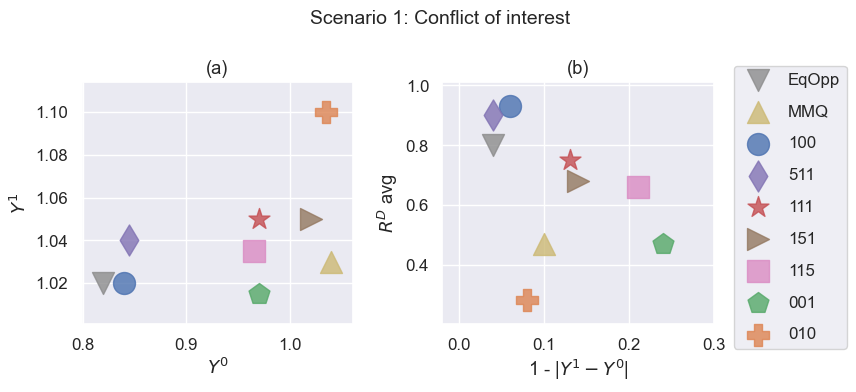

,Algo,Y0 AVG,Y1 AVG,|Y1-Y0| AVG,R^C/ep
0,EqOpp,0.820,1.020,0.96,0.800
0,MMQ,1.040,1.030,0.90,0.470
0,100,0.840,1.020,0.94,0.930
0,511,0.845,1.040,0.96,0.900
0,111,0.970,1.050,0.87,0.750
0,151,1.020,1.050,0.86,0.680
0,115,0.965,1.035,0.79,0.660
0,001,0.970,1.015,0.76,0.470
0,010,1.035,1.100,0.92,0.285


In [214]:
EXPERIMENT_NAME = 'scenEQ1_stepsEQ2_nEpsEQ100000'
# results = load_results(EXPERIMENT_NAME)
fig, axes, results_agg = plot_results(results, cmap=cmap, markers=markers, title='Scenario 1: Conflict of interest', plot_std=False)
display(results_agg)

### Scenario 2

In [197]:
results = pd.DataFrame({
    'Algo':  ['EqOpp'],
    # Left Plot
    'Y0 AVG': [.92],
    'Y1 AVG': [.92],
    # Right Plot
    '|Y1-Y0| AVG': [1-.06],
    'R^C/ep': [.6]
})

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['MMQ'],
    # Left Plot
    'Y0 AVG': [.94],
    'Y1 AVG': [.94],
    # Right Plot
    '|Y1-Y0| AVG': [1-.09],
    'R^C/ep': [.25],
})])

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['100'],
    # Left Plot
    'Y0 AVG': [.935],
    'Y1 AVG': [.935],
    # Right Plot
    '|Y1-Y0| AVG': [1-.08],
    'R^C/ep': [.92],
})])

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['511'],
    # Left Plot
    'Y0 AVG': [.955],
    'Y1 AVG': [.93],
    # Right Plot
    '|Y1-Y0| AVG': [1-.09],
    'R^C/ep': [.79],
})])

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['111'],
    # Left Plot
    'Y0 AVG': [.94],
    'Y1 AVG': [.995],
    # Right Plot
    '|Y1-Y0| AVG': [1-.15],
    'R^C/ep': [.7],
})])

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['151'],
    # Left Plot
    'Y0 AVG': [.932],
    'Y1 AVG': [1.],
    # Right Plot
    '|Y1-Y0| AVG': [1-.09],
    'R^C/ep': [.4],
})])

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['115'],
    # Left Plot
    'Y0 AVG': [.96],
    'Y1 AVG': [.985],
    # Right Plot
    '|Y1-Y0| AVG': [1-.19],
    'R^C/ep': [.5],
})])

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['001'],
    # Left Plot
    'Y0 AVG': [.965],
    'Y1 AVG': [.965],
    # Right Plot
    '|Y1-Y0| AVG': [1-.2],
    'R^C/ep': [.2],
})])

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['010'],
    # Left Plot
    'Y0 AVG': [.928],
    'Y1 AVG': [1.055],
    # Right Plot
    '|Y1-Y0| AVG': [1-.07],
    'R^C/ep': [.1],
})])

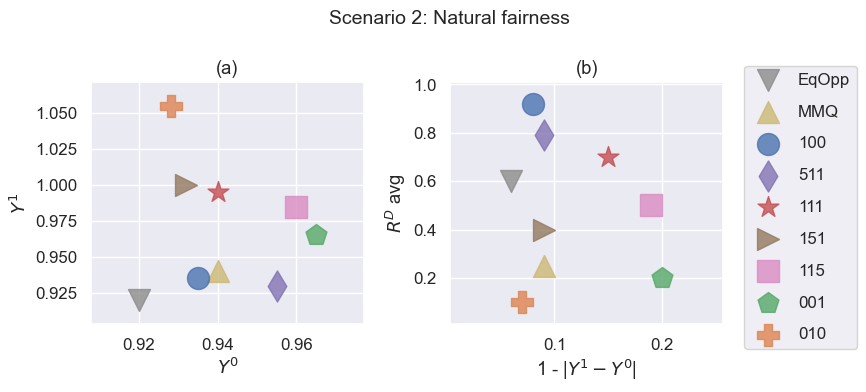

,Algo,Y0 AVG,Y1 AVG,|Y1-Y0| AVG,R^C/ep
0,EqOpp,0.920,0.920,0.94,0.60
0,MMQ,0.940,0.940,0.91,0.25
0,100,0.935,0.935,0.92,0.92
0,511,0.955,0.930,0.91,0.79
0,111,0.940,0.995,0.85,0.70
0,151,0.932,1.000,0.91,0.40
0,115,0.960,0.985,0.81,0.50
0,001,0.965,0.965,0.80,0.20
0,010,0.928,1.055,0.93,0.10


In [198]:
EXPERIMENT_NAME = 'scenEQ2_stepsEQ2_nEpsEQ100000'
# results = load_results(EXPERIMENT_NAME)
fig, axes, results_agg = plot_results(results, cmap=cmap, markers=markers, title='Scenario 2: Natural fairness', plot_std=False)
display(results_agg)

### Scenario 3

In [199]:
results = pd.DataFrame({
    'Algo':  ['EqOpp'],
    # Left Plot
    'Y0 AVG': [.95],
    'Y1 AVG': [.985],
    # Right Plot
    '|Y1-Y0| AVG': [1-.07],
    'R^C/ep': [.83]
})

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['MMQ'],
    # Left Plot
    'Y0 AVG': [.995],
    'Y1 AVG': [.99],
    # Right Plot
    '|Y1-Y0| AVG': [1-.11],
    'R^C/ep': [.55],
})])

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['100'],
    # Left Plot
    'Y0 AVG': [.982],
    'Y1 AVG': [1.008],
    # Right Plot
    '|Y1-Y0| AVG': [1-.045],
    'R^C/ep': [.93],
})])

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['511'],
    # Left Plot
    'Y0 AVG': [.97],
    'Y1 AVG': [1.03],
    # Right Plot
    '|Y1-Y0| AVG': [1-.055],
    'R^C/ep': [.92],
})])

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['111'],
    # Left Plot
    'Y0 AVG': [.985],
    'Y1 AVG': [1.025],
    # Right Plot
    '|Y1-Y0| AVG': [1-.085],
    'R^C/ep': [.91],
})])

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['151'],
    # Left Plot
    'Y0 AVG': [.975],
    'Y1 AVG': [1.025],
    # Right Plot
    '|Y1-Y0| AVG': [1-.1],
    'R^C/ep': [.875],
})])

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['115'],
    # Left Plot
    'Y0 AVG': [.982],
    'Y1 AVG': [1.02],
    # Right Plot
    '|Y1-Y0| AVG': [1-.14],
    'R^C/ep': [.775],
})])

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['001'],
    # Left Plot
    'Y0 AVG': [.987],
    'Y1 AVG': [1.023],
    # Right Plot
    '|Y1-Y0| AVG': [1-.195],
    'R^C/ep': [.41],
})])

results = pd.concat([results, pd.DataFrame({
    'Algo':  ['010'],
    # Left Plot
    'Y0 AVG': [.997],
    'Y1 AVG': [1.057],
    # Right Plot
    '|Y1-Y0| AVG': [1-.14],
    'R^C/ep': [.33],
})])

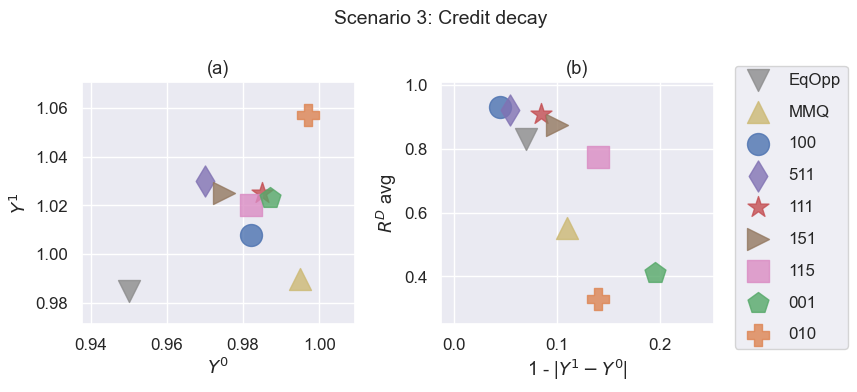

,Algo,Y0 AVG,Y1 AVG,|Y1-Y0| AVG,R^C/ep
0,EqOpp,0.950,0.985,0.930,0.830
0,MMQ,0.995,0.990,0.890,0.550
0,100,0.982,1.008,0.955,0.930
0,511,0.970,1.030,0.945,0.920
0,111,0.985,1.025,0.915,0.910
0,151,0.975,1.025,0.900,0.875
0,115,0.982,1.020,0.860,0.775
0,001,0.987,1.023,0.805,0.410
0,010,0.997,1.057,0.860,0.330


In [200]:
EXPERIMENT_NAME = 'scenEQ3_stepsEQ2_nEpsEQ100000'
# results = load_results(EXPERIMENT_NAME)
fig, axes, results_agg = plot_results(results, cmap=cmap, markers=markers, title='Scenario 3: Credit decay', plot_std=False)
display(results_agg)